In [1]:
cd("..") # set correct working directory 
cd("..") 
pwd() # the path should go to the folder with the .git file 

"/home/samuel/Documents/projects/cpmmh for sdemems/code"

In [2]:
using Pkg
using Pkg
using PyCall 
PyDict(pyimport("matplotlib")["rcParams"])["ps.useafm"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["pdf.use14corefonts"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["text.usetex"] = [true]
using PyPlot 
using LinearAlgebra
using DataFrames
using KernelDensity  
using LaTeXStrings
using Distributions
using CSV

import Statistics.mean
import Statistics.std

nbr_particles_pf = [20, 50, 100, 200, 250, 500, 1000, 2000, 3000, 4000]

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[2]:4
└ @ Core In[2]:4
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[2]:5
└ @ Core In[2]:5
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[2]:6
└ @ Core In[2]:6


10-element Array{Int64,1}:
   20
   50
  100
  200
  250
  500
 1000
 2000
 3000
 4000

# Bootstrap filter

In [3]:
data = Matrix(CSV.read("data/SDEMEM OU neuron data/tune_nbr_particles_bootstrap.csv"))

100×11 Array{Float64,2}:
   46.4279  -1.46921e8  -4.24556e7  -1.78283e7  …  -70820.5        -20230.3 
   78.8238  -1.44371e8  -4.28706e7  -1.76876e7         -1.68838e5  -25875.6 
  121.69    -1.4498e8   -4.20451e7  -1.76199e7         -1.33387e5  -31050.6 
  238.635   -1.52711e8  -4.32055e7  -1.85465e7         -1.27704e5  -59622.8 
  149.968   -1.48301e8  -4.32647e7  -1.82278e7         -1.3076e5   -22916.0 
  234.475   -1.49651e8  -4.29686e7  -1.74039e7  …      -1.17347e5   -7976.85
  405.733   -1.43999e8  -4.25277e7  -1.72626e7         -1.08914e5  -60860.1 
  740.088   -1.43856e8  -4.3844e7   -1.76037e7         -1.06908e5  -83310.0 
 1126.85    -1.4605e8   -4.28301e7  -1.8363e7          -1.33431e5    4295.59
 1475.89    -1.44797e8  -4.39253e7  -1.78535e7         -1.3641e5   -40050.1 
    0.0     -1.45112e8  -4.26409e7  -1.77108e7  …      -1.51069e5  -48555.8 
    0.0     -1.46925e8  -4.36574e7  -1.73195e7         -1.28257e5   -4579.99
    0.0     -1.45451e8  -4.36511e7  -1.73431e7     

In [4]:
runtimes = data[1:size(data,2)-1,1]
pf_vals = data[:,2:end]

100×10 Array{Float64,2}:
 -1.46921e8  -4.24556e7  -1.78283e7  -7.75245e6  …  -70820.5        -20230.3 
 -1.44371e8  -4.28706e7  -1.76876e7  -7.31158e6         -1.68838e5  -25875.6 
 -1.4498e8   -4.20451e7  -1.76199e7  -7.86053e6         -1.33387e5  -31050.6 
 -1.52711e8  -4.32055e7  -1.85465e7  -7.5621e6          -1.27704e5  -59622.8 
 -1.48301e8  -4.32647e7  -1.82278e7  -7.18789e6         -1.3076e5   -22916.0 
 -1.49651e8  -4.29686e7  -1.74039e7  -7.38346e6  …      -1.17347e5   -7976.85
 -1.43999e8  -4.25277e7  -1.72626e7  -7.25314e6         -1.08914e5  -60860.1 
 -1.43856e8  -4.3844e7   -1.76037e7  -8.11746e6         -1.06908e5  -83310.0 
 -1.4605e8   -4.28301e7  -1.8363e7   -7.62571e6         -1.33431e5    4295.59
 -1.44797e8  -4.39253e7  -1.78535e7  -7.44305e6         -1.3641e5   -40050.1 
 -1.45112e8  -4.26409e7  -1.77108e7  -7.15975e6  …      -1.51069e5  -48555.8 
 -1.46925e8  -4.36574e7  -1.73195e7  -7.72557e6         -1.28257e5   -4579.99
 -1.45451e8  -4.36511e7  -1.73431e7  -7

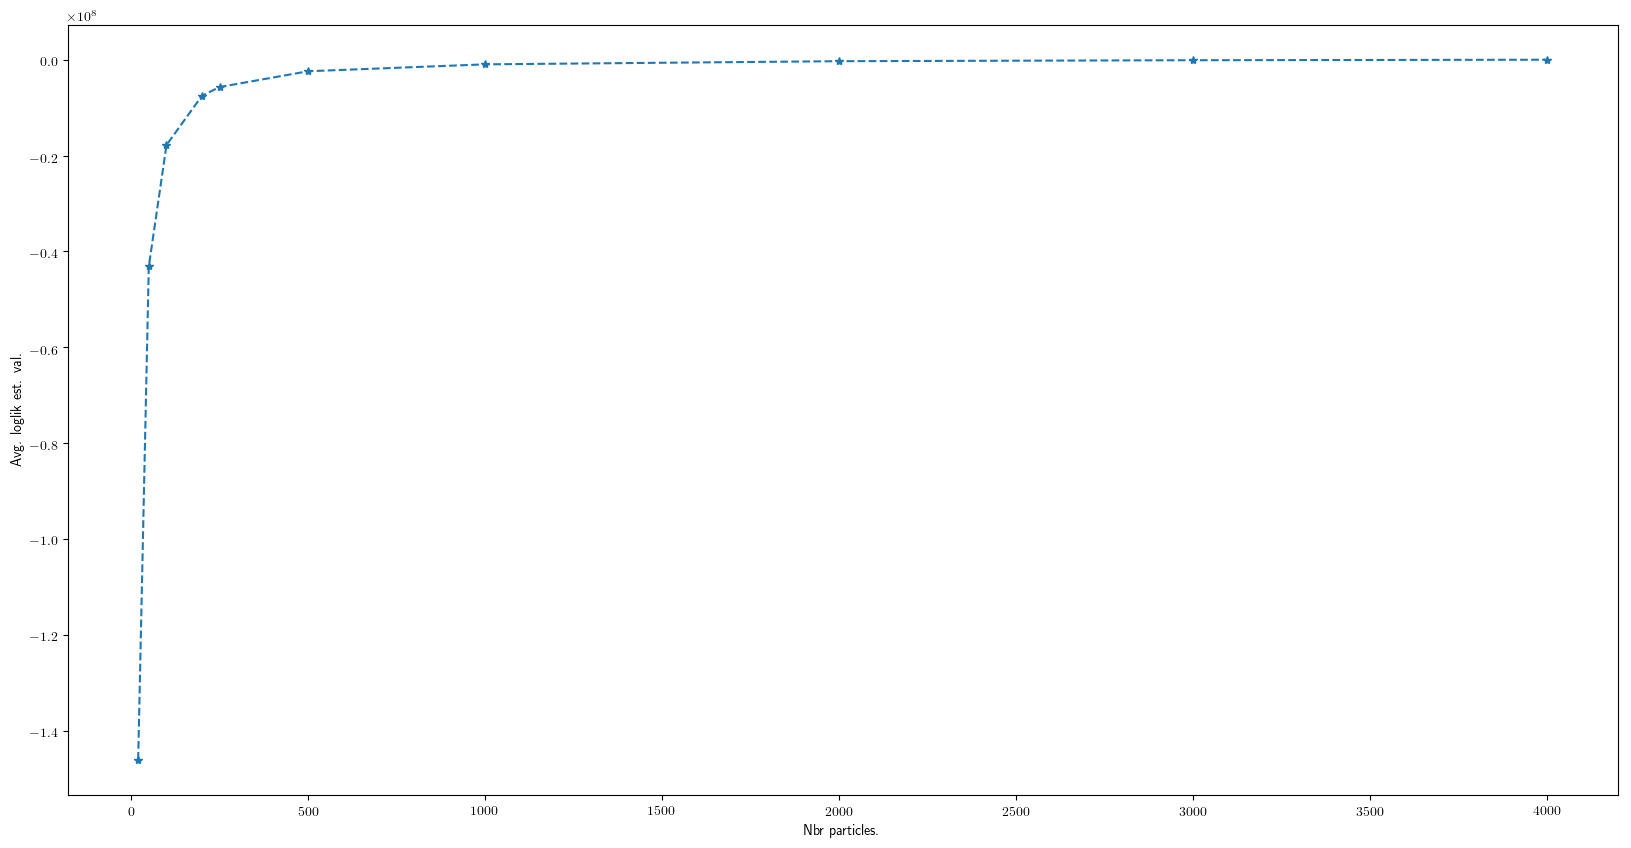

PyObject Text(24,0.5,'Avg. loglik est. val.')

In [5]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, mean(pf_vals, dims = 1)[:], "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Avg. loglik est. val.")

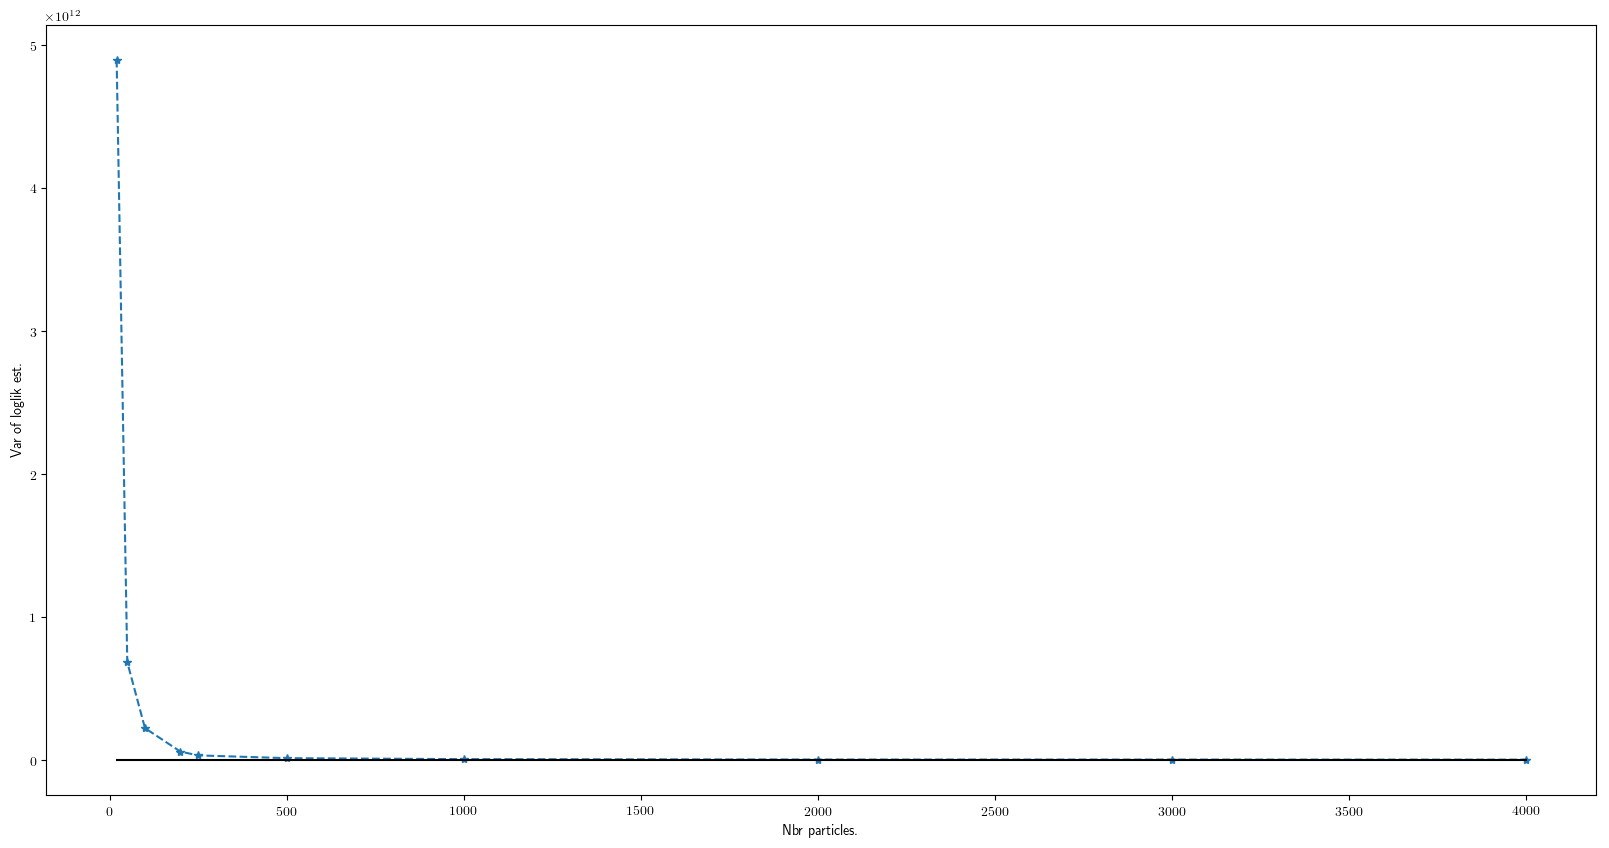

PyObject Text(24,0.5,'Var of loglik est.')

In [6]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, var(pf_vals, dims = 1)[:], "--*")
PyPlot.plot(nbr_particles_pf, 2*ones(length(nbr_particles_pf),1), "k")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")

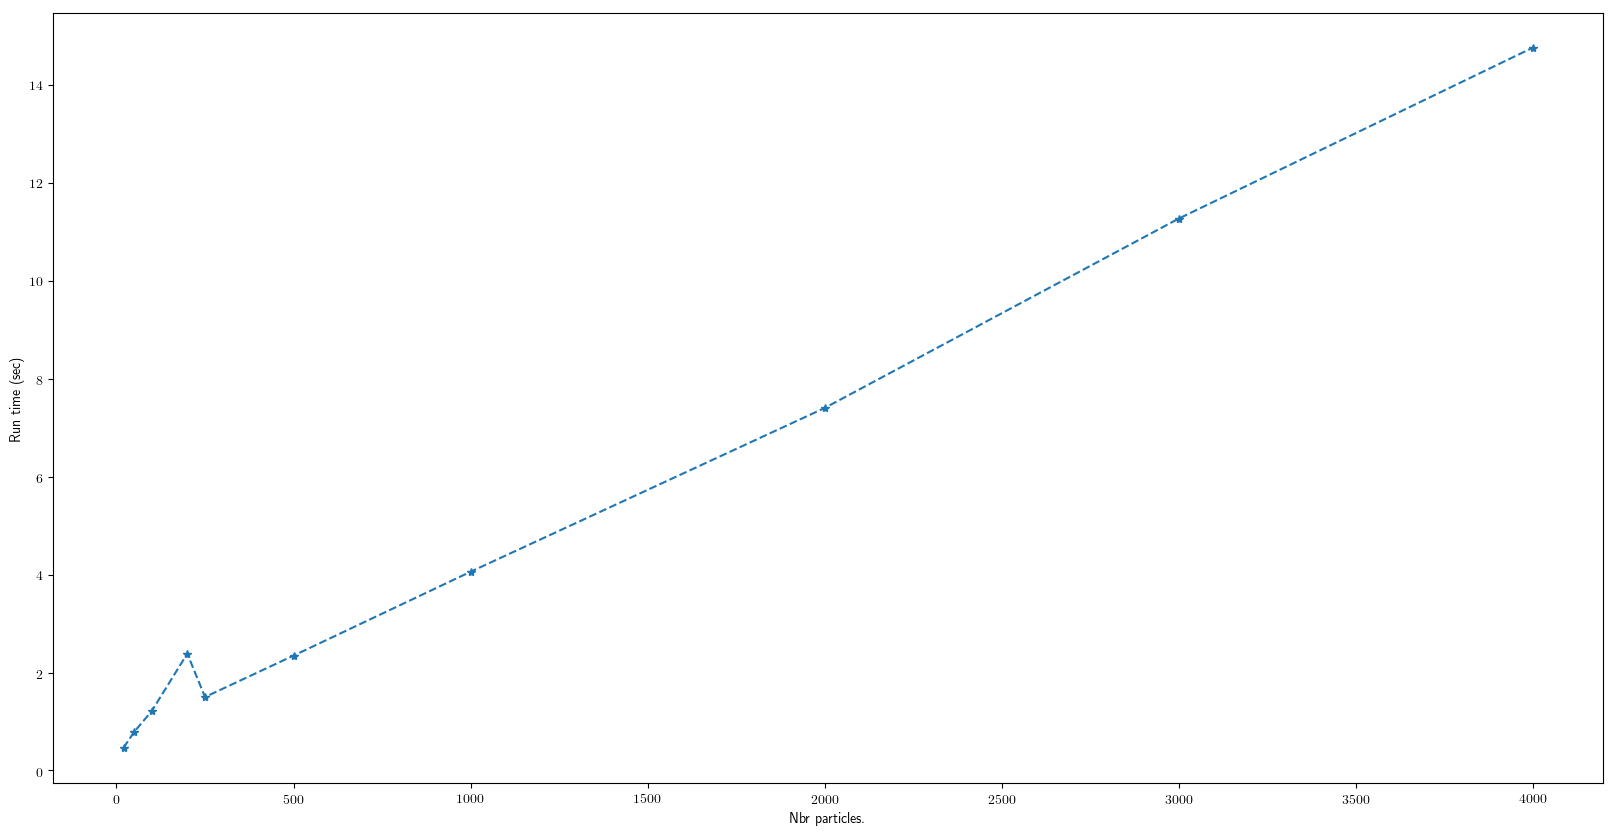

PyObject Text(24,0.5,'Run time (sec)')

In [7]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, runtimes/size(data,1), "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")


# Bridge filter (no sorting)

In [22]:
data = Matrix(CSV.read("data/SDEMEM OU neuron data/tune_nbr_particles_bridge.csv"))

100×11 Array{Float64,2}:
   51.7399       1.4616e5        1.84546e5  …       2.11712e5       2.11698e5
   81.1898       1.07325e5       1.89306e5          2.11711e5       2.11713e5
  137.943        1.17458e5  184910.0                2.11708e5       2.11712e5
  267.686        1.24842e5       1.97909e5          2.11709e5       2.11713e5
  180.647        1.28224e5       2.03503e5          2.11709e5       2.11711e5
  273.112        1.20193e5       1.87561e5  …       2.11709e5       2.11709e5
  477.402    97750.2             1.96757e5          2.11706e5       2.11699e5
  881.85         1.46428e5       1.60255e5          2.1171e5        2.11711e5
 1382.27         1.43401e5       2.02264e5          2.11713e5       2.11712e5
 1794.51         1.26355e5       1.86574e5          2.11716e5       2.11713e5
    0.0          1.57557e5       2.00873e5  …       2.11711e5       2.11715e5
    0.0     127219.0        170864.0                2.11719e5       2.11708e5
    0.0          1.07637e5       2.0118

In [23]:
runtimes = data[1:size(data,2)-1,1]
pf_vals = data[:,2:end]

100×10 Array{Float64,2}:
      1.4616e5        1.84546e5  …       2.11712e5       2.11698e5
      1.07325e5       1.89306e5          2.11711e5       2.11713e5
      1.17458e5  184910.0                2.11708e5       2.11712e5
      1.24842e5       1.97909e5          2.11709e5       2.11713e5
      1.28224e5       2.03503e5          2.11709e5       2.11711e5
      1.20193e5       1.87561e5  …       2.11709e5       2.11709e5
  97750.2             1.96757e5          2.11706e5       2.11699e5
      1.46428e5       1.60255e5          2.1171e5        2.11711e5
      1.43401e5       2.02264e5          2.11713e5       2.11712e5
      1.26355e5       1.86574e5          2.11716e5       2.11713e5
      1.57557e5       2.00873e5  …       2.11711e5       2.11715e5
 127219.0        170864.0                2.11719e5       2.11708e5
      1.07637e5       2.01189e5          2.11711e5       2.11711e5
      ⋮                          ⋱                                
      1.17014e5       2.02017e5      

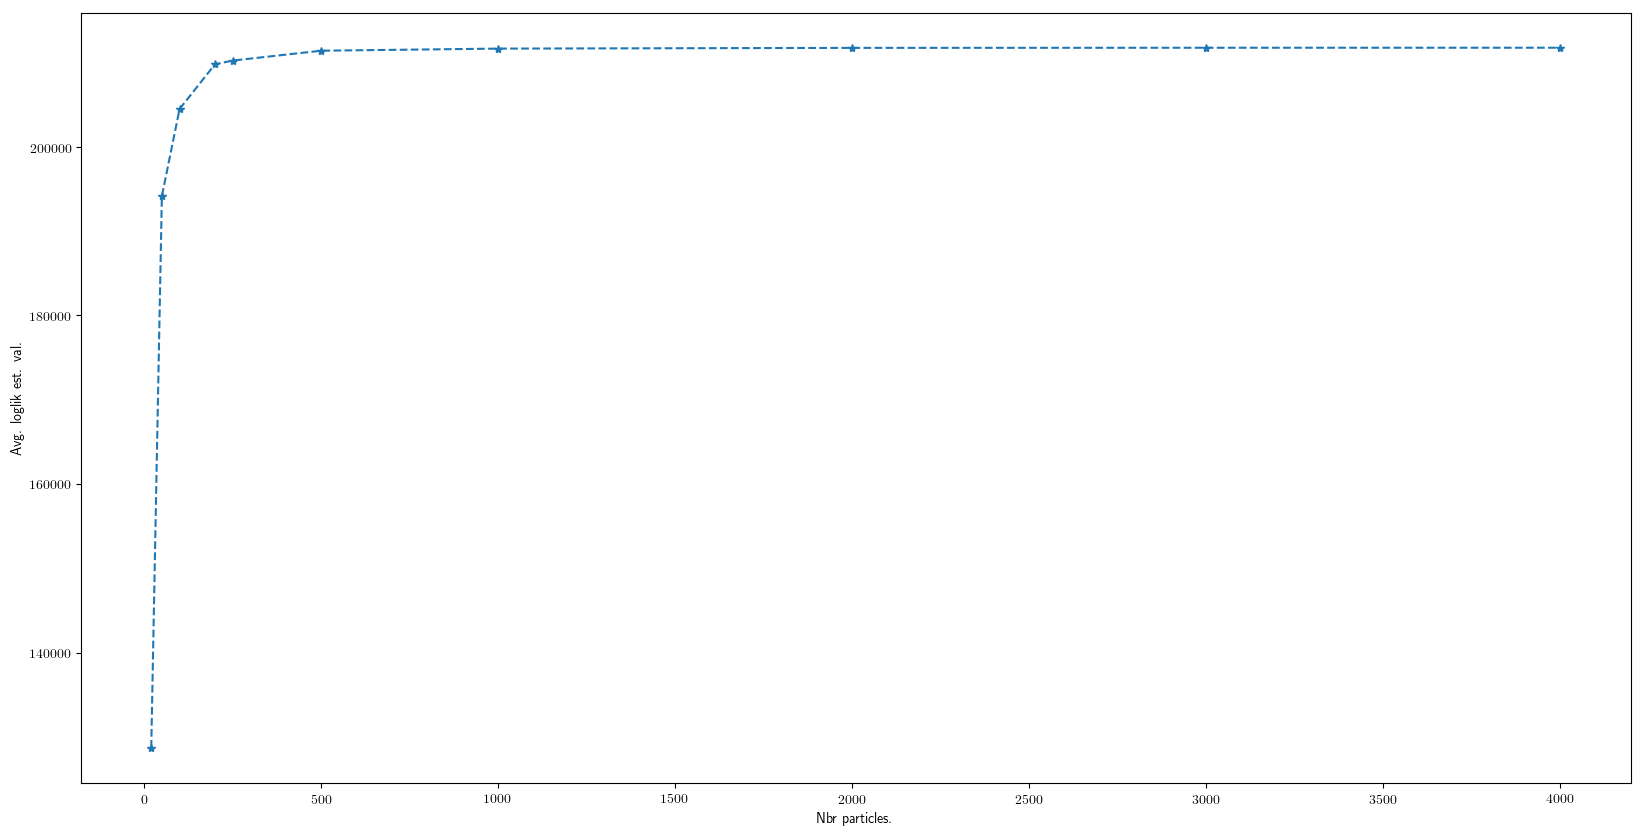

PyObject Text(24,0.5,'Avg. loglik est. val.')

In [24]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, mean(pf_vals, dims = 1)[:], "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Avg. loglik est. val.")

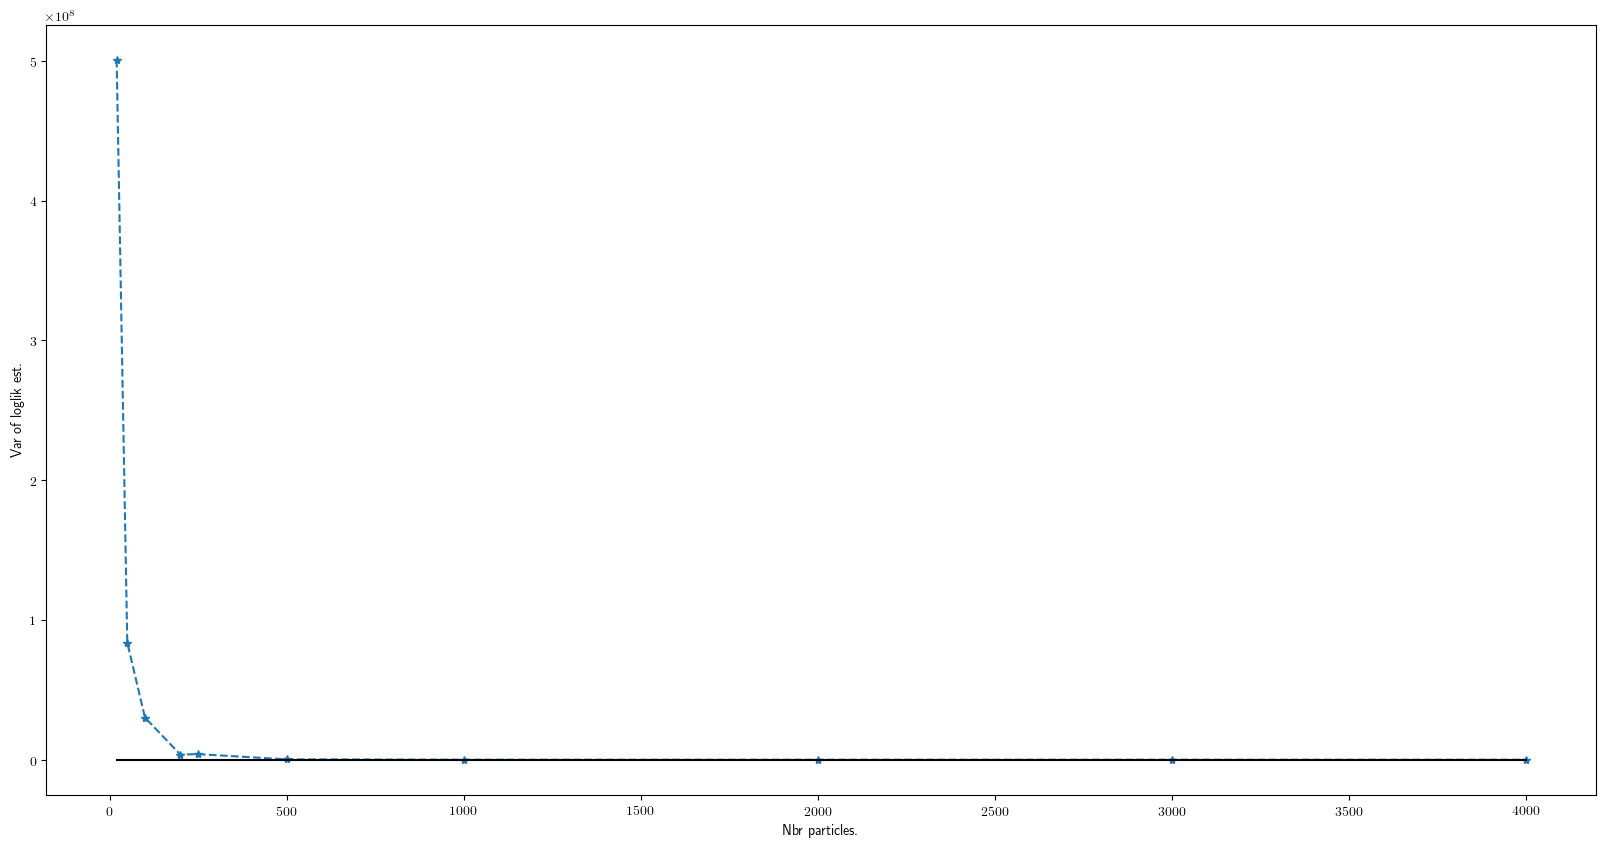

10-element Array{Float64,1}:
      5.0079165086016774e8
      8.383521536180633e7 
      3.0115011090791795e7
      3.6615612482319693e6
      4.015835751328052e6 
 259821.39587058232       
  20898.060090096576      
    872.6878788317307     
    178.58890568421285    
     90.36362666718381    

In [25]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, var(pf_vals, dims = 1)[:], "--*")
PyPlot.plot(nbr_particles_pf, 2*ones(length(nbr_particles_pf),1), "k")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")
var_no_sort = var(pf_vals, dims = 1)[:]

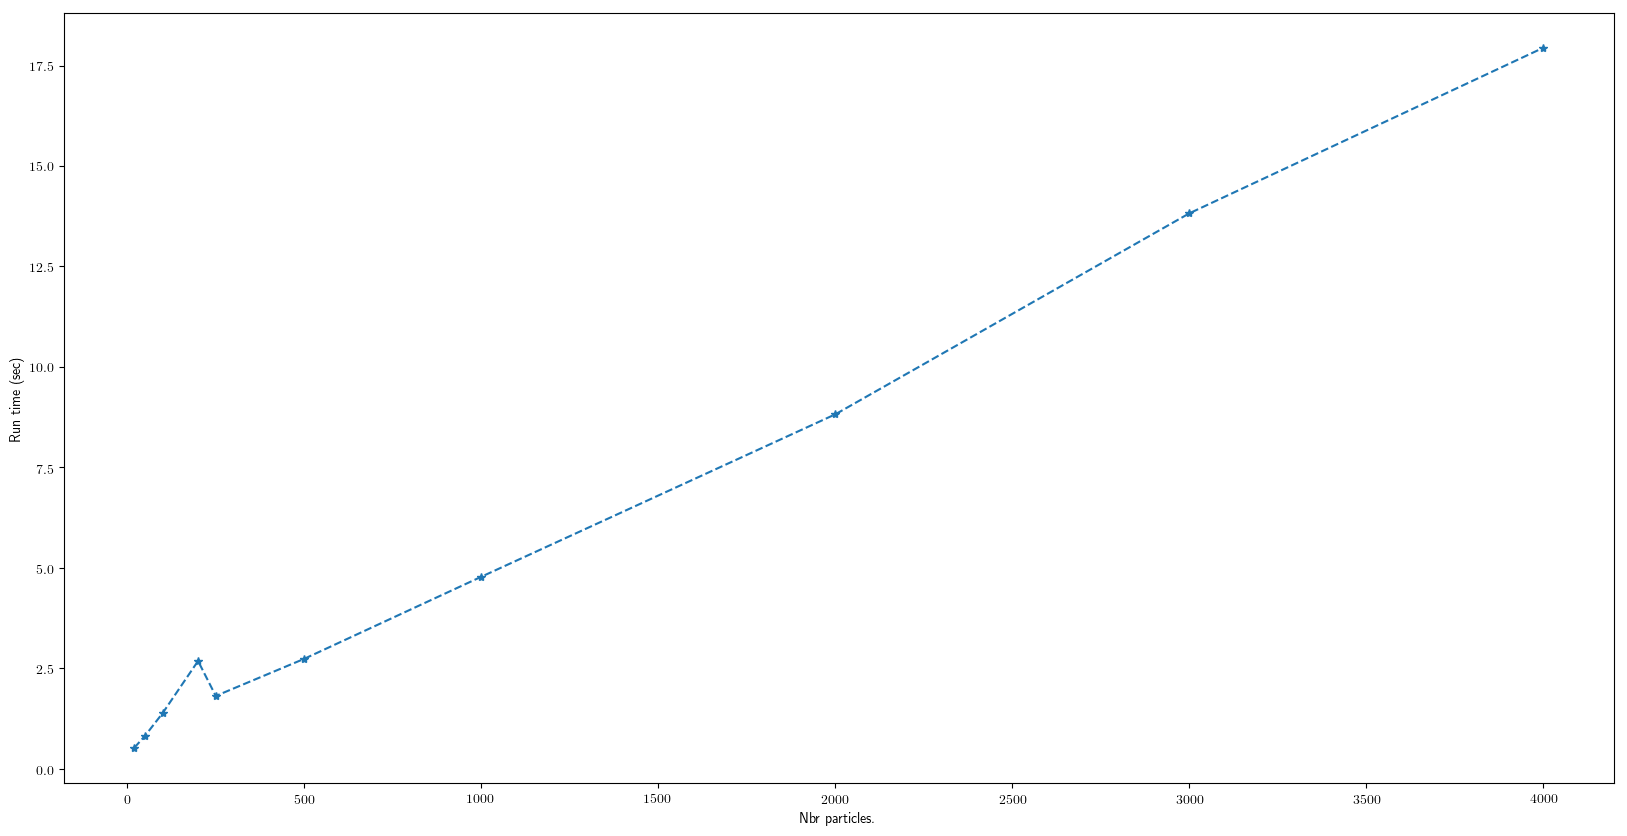

10-element Array{Float64,1}:
  0.51739923774     
  0.8118977963599999
  1.37942777593     
  2.6768632400400003
  1.80647471758     
  2.7311224521399997
  4.77401871336     
  8.81849587656     
 13.82266494368     
 17.94506903765     

In [26]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, runtimes/size(data,1), "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")
runtimes_no_sort = runtimes/size(data,1)

# Bridge filter (sorting)

In [27]:
data = Matrix(CSV.read("data/SDEMEM OU neuron data/tune_nbr_particles_bridge_resample.csv"))

100×11 Array{Float64,2}:
   74.4829  146160.0             1.84546e5  …       2.11712e5       2.11698e5
  120.355        1.07325e5       1.89306e5          2.11711e5       2.11713e5
  183.305        1.17458e5  184910.0                2.11708e5       2.11712e5
  359.599        1.24842e5       1.97909e5          2.11709e5       2.11713e5
  275.937        1.28224e5       2.03503e5          2.11709e5       2.11711e5
  438.838        1.20193e5       1.87561e5  …       2.11709e5       2.11709e5
  717.443    97750.2             1.96757e5          2.11706e5       2.11699e5
 1384.14         1.46428e5       1.60255e5          2.1171e5        2.11711e5
 1911.24         1.43401e5       2.02264e5          2.11713e5       2.11712e5
 2532.24         1.26355e5       1.86574e5          2.11716e5       2.11713e5
    0.0          1.57557e5       2.00873e5  …       2.11711e5       2.11715e5
    0.0     127219.0        170864.0                2.11719e5       2.11708e5
    0.0          1.07637e5       2.0118

In [28]:
runtimes = data[1:size(data,2)-1,1]
pf_vals = data[:,2:end]

100×10 Array{Float64,2}:
 146160.0             1.84546e5  …       2.11712e5       2.11698e5
      1.07325e5       1.89306e5          2.11711e5       2.11713e5
      1.17458e5  184910.0                2.11708e5       2.11712e5
      1.24842e5       1.97909e5          2.11709e5       2.11713e5
      1.28224e5       2.03503e5          2.11709e5       2.11711e5
      1.20193e5       1.87561e5  …       2.11709e5       2.11709e5
  97750.2             1.96757e5          2.11706e5       2.11699e5
      1.46428e5       1.60255e5          2.1171e5        2.11711e5
      1.43401e5       2.02264e5          2.11713e5       2.11712e5
      1.26355e5       1.86574e5          2.11716e5       2.11713e5
      1.57557e5       2.00873e5  …       2.11711e5       2.11715e5
 127219.0        170864.0                2.11719e5       2.11708e5
      1.07637e5       2.01189e5          2.11711e5       2.11711e5
      ⋮                          ⋱                                
      1.17014e5       2.02017e5      

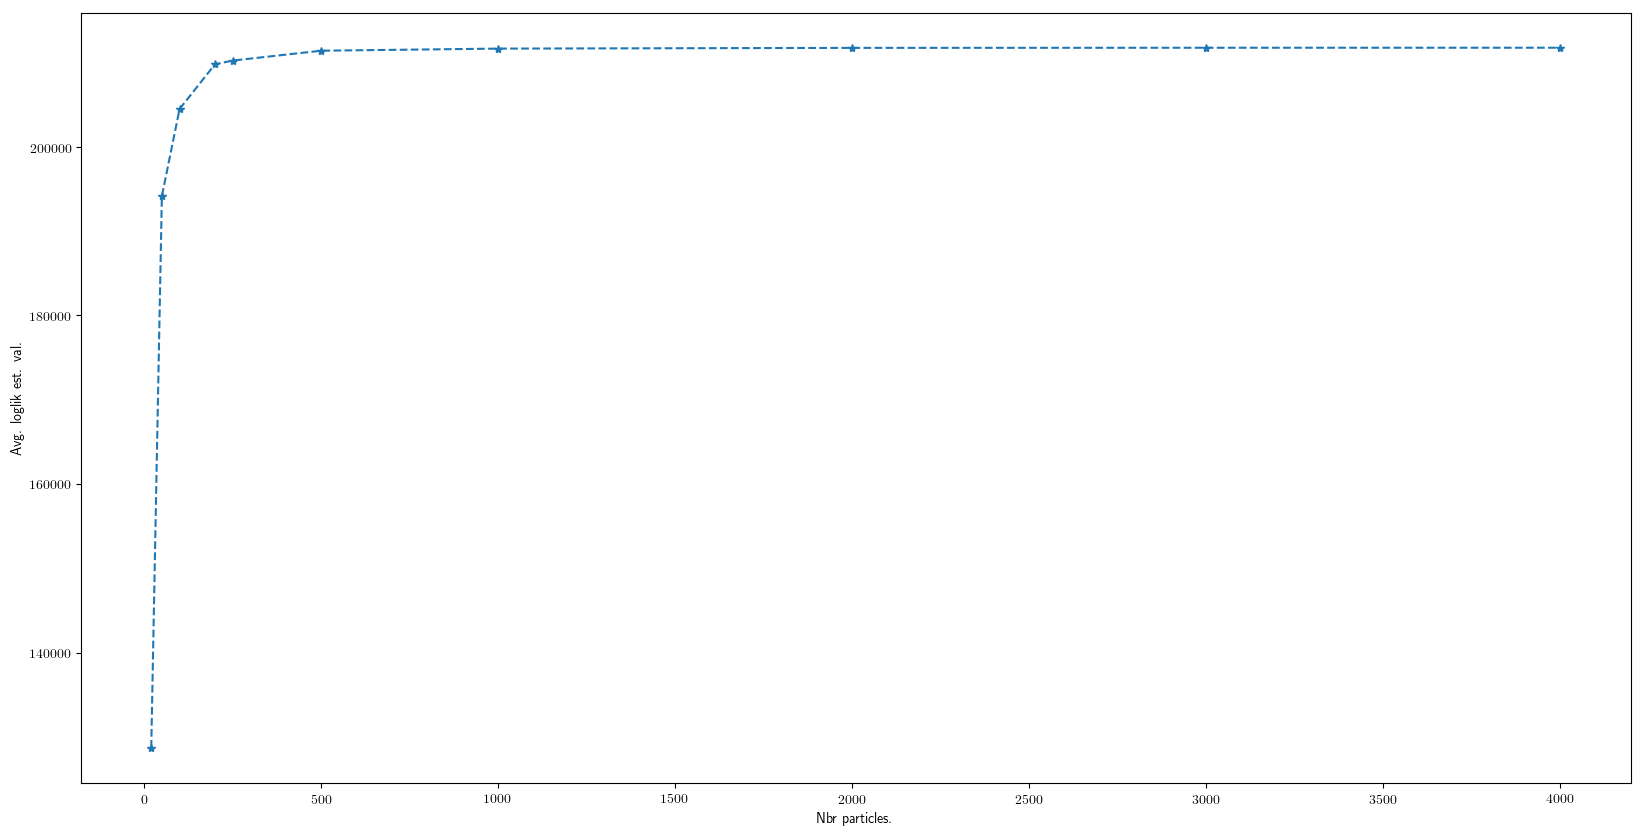

PyObject Text(24,0.5,'Avg. loglik est. val.')

In [29]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, mean(pf_vals, dims = 1)[:], "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Avg. loglik est. val.")

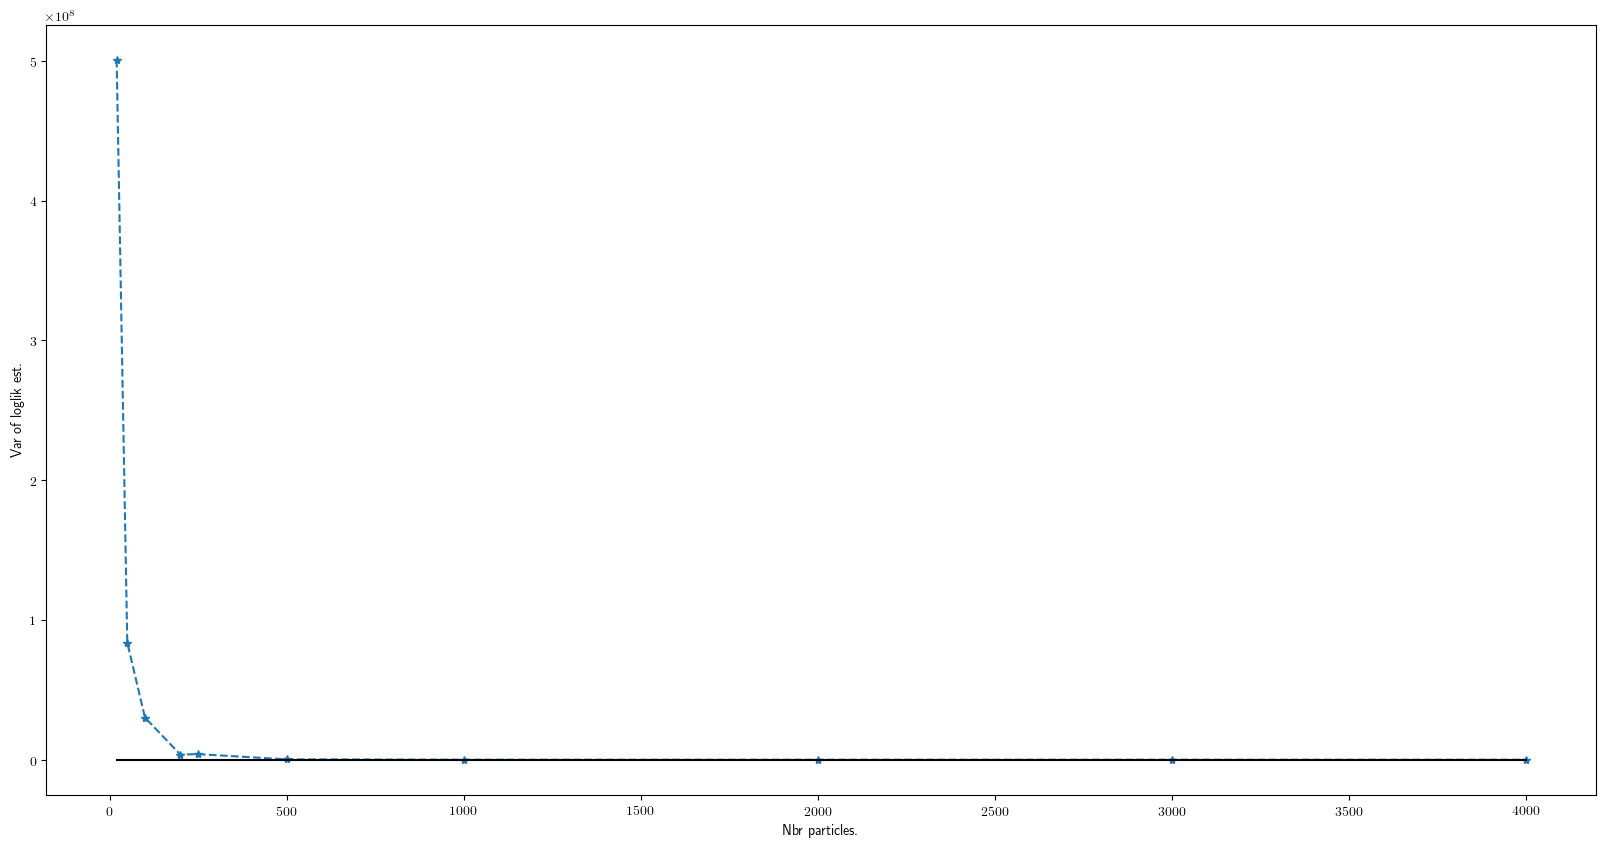

10-element Array{Float64,1}:
      5.007917455885238e8 
      8.383523014258006e7 
      3.011500814411245e7 
      3.6615682473293506e6
      4.0158392992508425e6
 259820.9455435708        
  20898.243417029575      
    872.6865607289285     
    178.59588925993512    
     90.36685780650157    

In [30]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, var(pf_vals, dims = 1)[:], "--*")
PyPlot.plot(nbr_particles_pf, 2*ones(length(nbr_particles_pf),1), "k")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")
var_sort = var(pf_vals, dims = 1)[:]

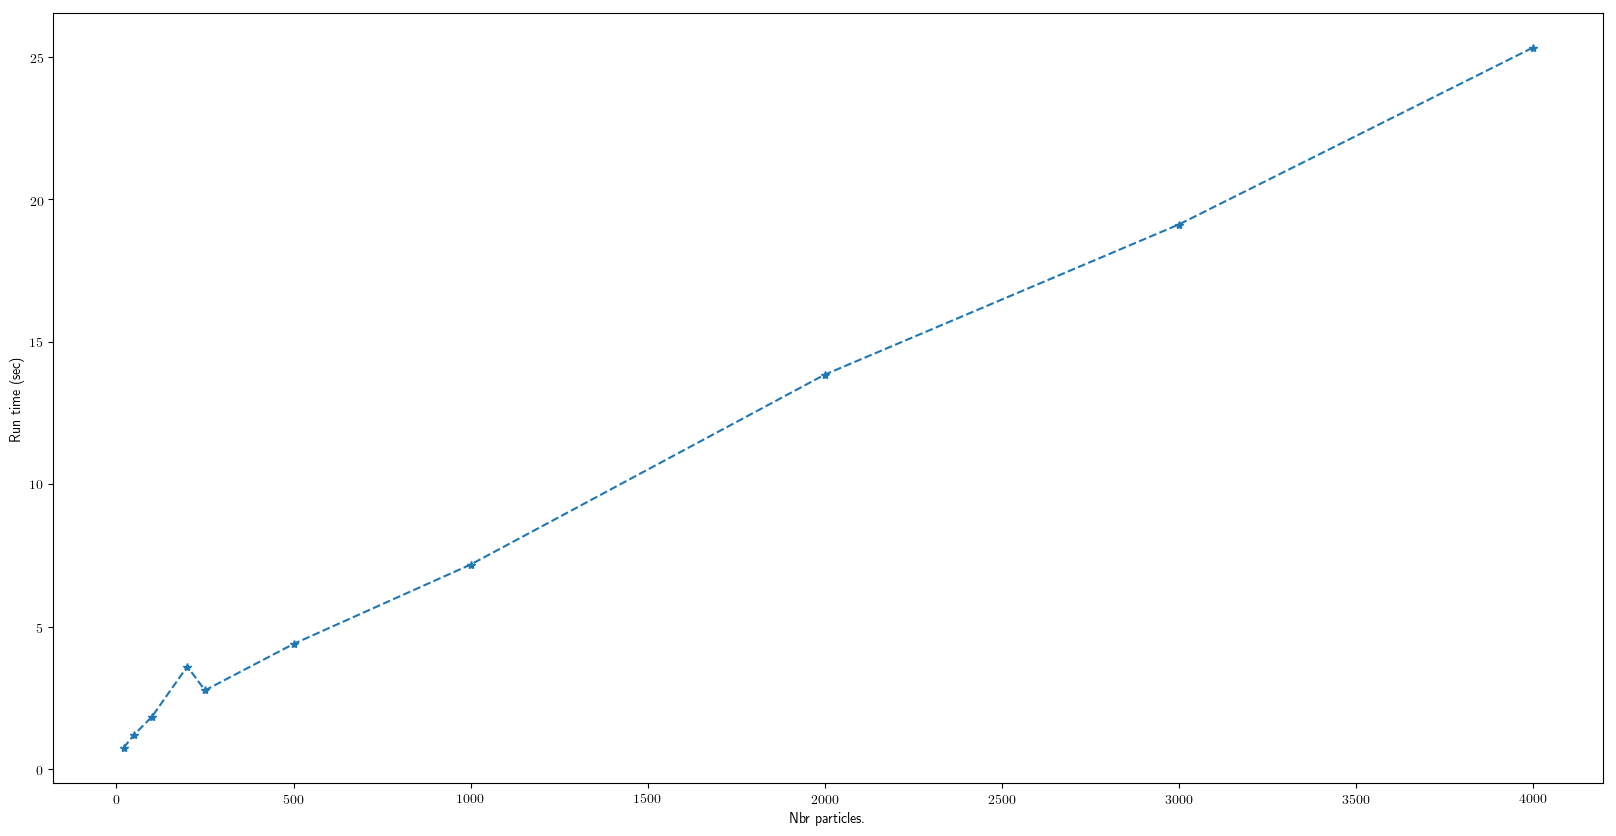

10-element Array{Float64,1}:
  0.74482949999     
  1.20354798676     
  1.83305092977     
  3.5959947332      
  2.7593690141100002
  4.3883771533100004
  7.17443101932     
 13.841360460850002 
 19.1123828407      
 25.32235978182     

In [31]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, runtimes/size(data,1), "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")
runtimes_sort = runtimes/size(data,1)

# Compare var for sorting and no storting 

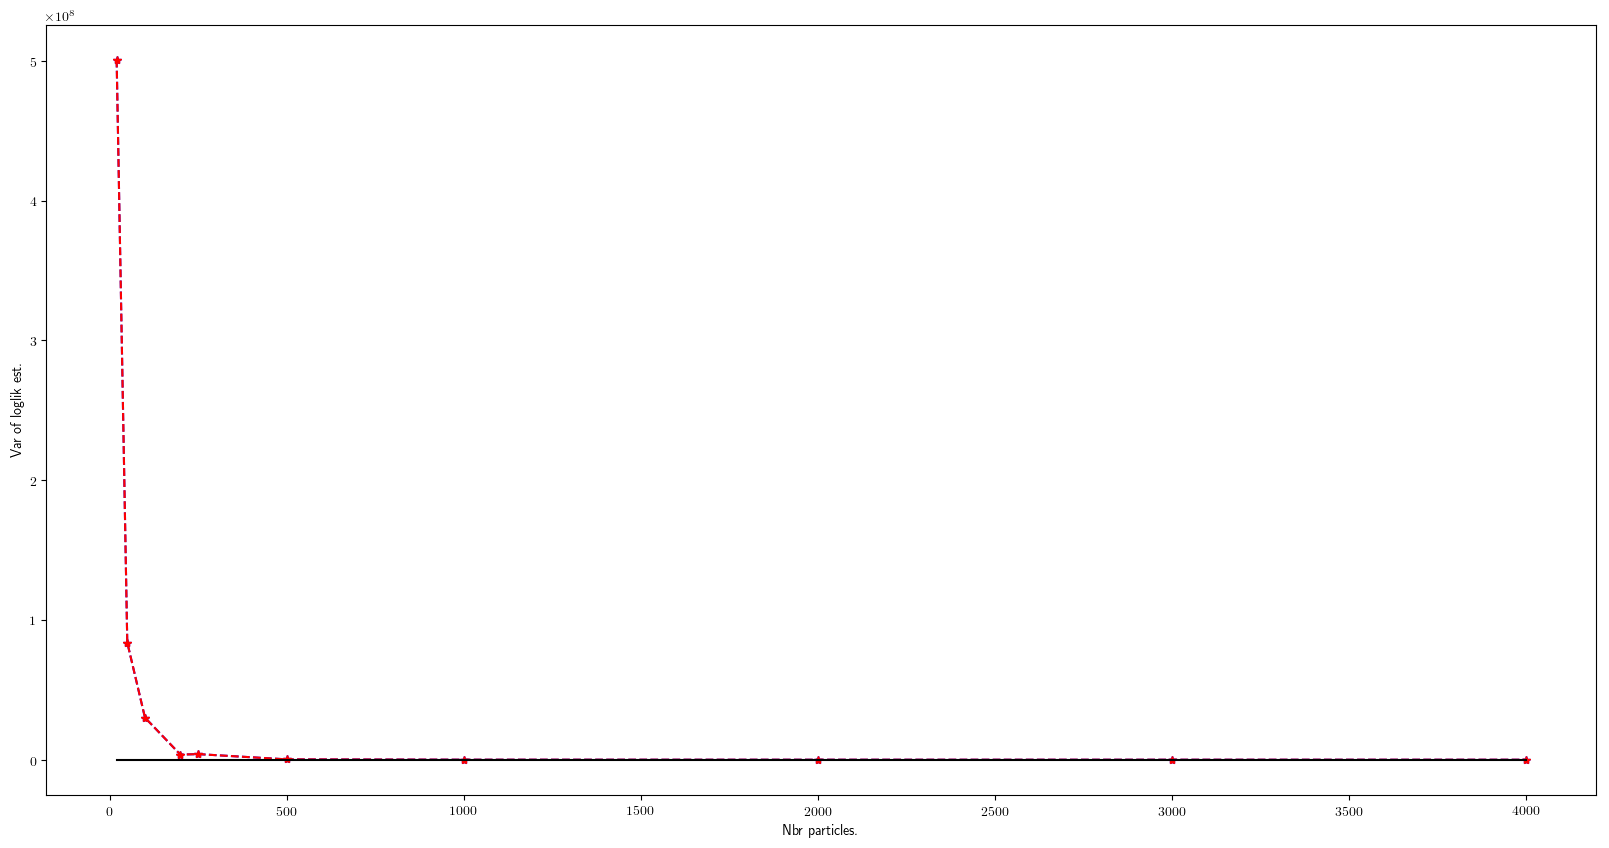

PyObject Text(24,0.5,'Var of loglik est.')

In [32]:
start_idx = 1

PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf[start_idx:end], var_sort[start_idx:end], "--*b")
PyPlot.plot(nbr_particles_pf[start_idx:end], var_no_sort[start_idx:end], "--*r")
PyPlot.plot(nbr_particles_pf[start_idx:end], 2*ones(length(nbr_particles_pf),1)[start_idx:end], "k")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")

In [33]:
var_sort[6]

259820.9455435708

In [34]:
var_no_sort[6]

259821.39587058232

# Compare runtime for sort and no sorting 

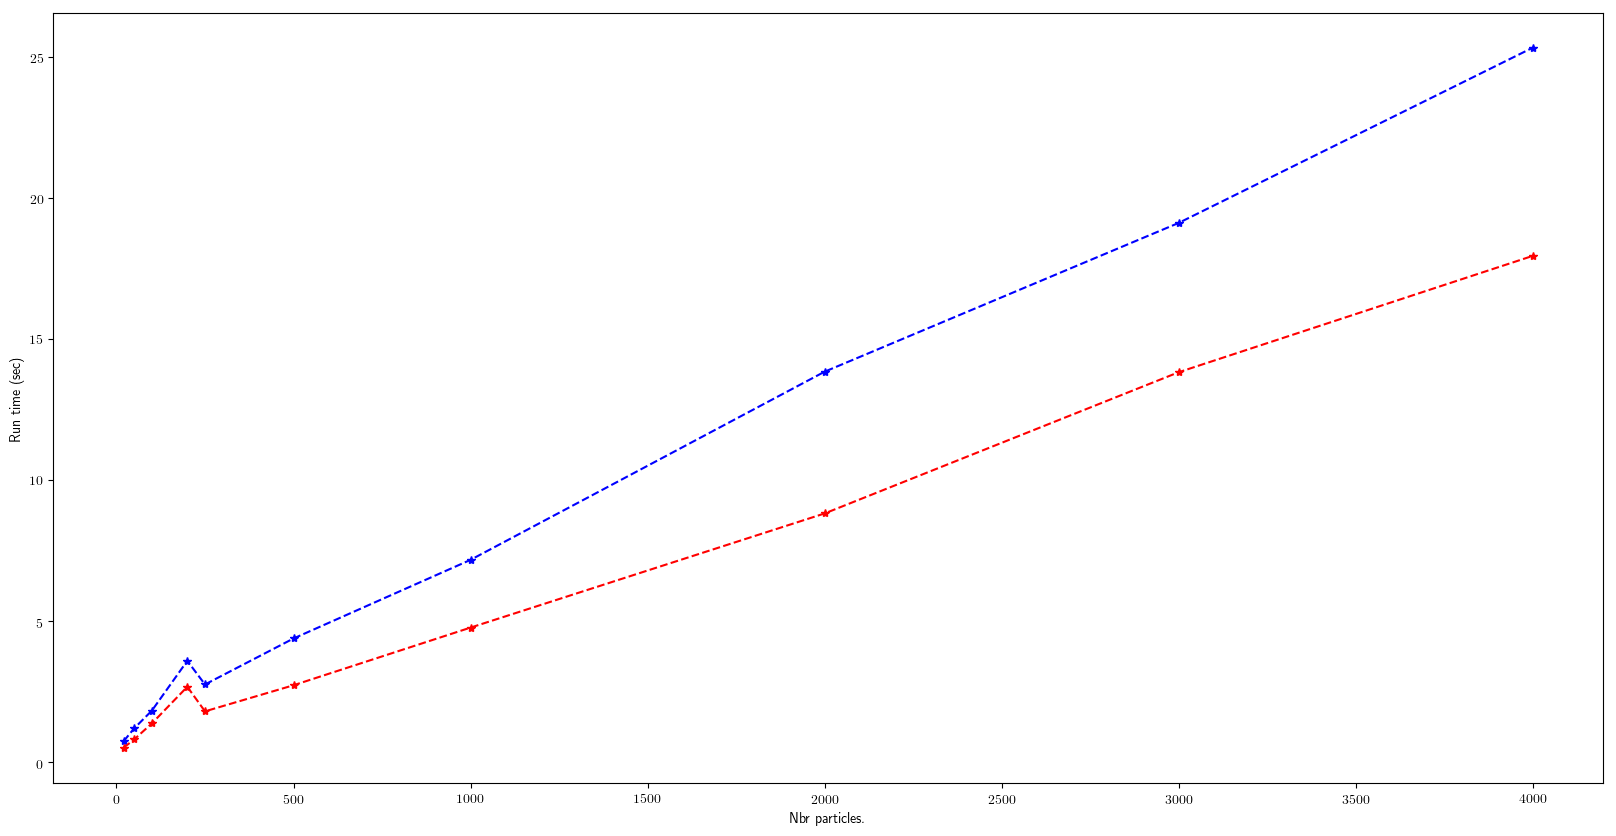

PyObject Text(24,0.5,'Run time (sec)')

In [35]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, runtimes_sort, "--*b")
PyPlot.plot(nbr_particles_pf, runtimes_no_sort, "--*r")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")